## **Assignment 5 - Systematic Investments**

### **Understanding Fund Performance**

53127 - Miguel Teodoro

For this assignment, the Vanguard Global Equity Fund (VHGEX)7 was analysed. This mutual fund provides investors with exposure to a diverse range of companies located around the world. The fund invests in over 500 stocks from more than 30 countries, with the United States representing approximately 50% of its assets. While the fund offers the potential for long-term capital growth through global equity exposure, investors should be aware that it is subject to not only stock market risk, but also currency risk, and country risk. The fund may be suitable for long-term investors who are comfortable with the added volatility that comes with international investing (namely Emerging Markets). The fund’s top three holdings are: Microsoft, Anthem and Mastercard. Currently the fund has net assets of $7.2 billion under management while charging a fee of 0.41% p.a.

The following factors were extracted to observe fund return exposures: Fama-French 5-factors, Quality-minus-Junk factor (Asness, Frazzini and Pedersen), Value and Momentum factors (Asness, Moskowitz and Pedersen), Carry factors (Koijen, Moskowitz, Pedersen and Vrugt), and Time Series Momentum factors (Moskowitz, Ooi and Pedersen)

In [1]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fund_returns = pd.read_csv('fund-returns.csv')
ff5 = pd.read_csv('F-F_Research_Data_5_Factors_2x3.csv')
qmj = pd.read_excel('Quality Minus Junk Factors Monthly.xlsx', sheet_name='Data')
carry = pd.read_excel('strategy_returns_20170405-carry.xlsx', sheet_name='Data')
tsmom = pd.read_excel('Time Series Momentum Factors Monthly.xlsx', sheet_name='Data')
valmom = pd.read_excel('Value and Momentum Everywhere Factors Monthly.xlsx', sheet_name='Data')

### **Fund Returns**

In [3]:
fund_returns = fund_returns.iloc[:,[1,4]].rename(columns={'caldt': 'Date', 'mret':'Ret'}).dropna(axis=0).reset_index(drop=True)
fund_returns.Date = pd.to_datetime(fund_returns.Date).dt.strftime('%Y-%m')
fund_returns.head()

<ipython-input-3-648ea7b7256e>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  fund_returns.Date = pd.to_datetime(fund_returns.Date).dt.strftime('%Y-%m')


,Date,Ret
0,1995-09,0.022750
1,1995-10,-0.026112
2,1995-11,0.032771
3,1995-12,0.019276
4,1996-01,0.019943


### **FF5**

In [4]:
ff5.drop('RF', axis=1, inplace=True)
ff5['Date'] = pd.to_datetime(ff5.Date, format="%Y%m").dt.strftime('%Y-%m')
ff5.iloc[:,1:6] = ff5.iloc[:,1:6] / 100
ff5.head()

,Date,Mkt-RF,SMB,HML,RMW,CMA
0,1963-07,-0.0039,-0.0041,-0.0097,0.0068,-0.0118
1,1963-08,0.0507,-0.0080,0.0180,0.0036,-0.0035
2,1963-09,-0.0157,-0.0052,0.0013,-0.0071,0.0029
3,1963-10,0.0253,-0.0139,-0.0010,0.0280,-0.0201
4,1963-11,-0.0085,-0.0088,0.0175,-0.0051,0.0224


### **QMJ**

In [5]:
qmj = qmj.rename(columns={'DATE': 'Date', 'Global': 'QMJ'}).dropna(axis=0).reset_index(drop=True)
qmj.Date = pd.to_datetime(qmj.Date).dt.strftime('%Y-%m')
qmj.head()

,Date,QMJ
0,1989-07,0.012382
1,1989-08,0.000980
2,1989-09,0.002708
3,1989-10,0.031229
4,1989-11,0.007580


### **Carry**

In [6]:
carry = carry.rename(columns={'Dates': 'Date', 'TIMING - Carry1m to 0': 'Carry1m0', 'TIMING - Carry1m to mean': 'Carry1mmean'}).dropna(axis=0).reset_index(drop=True)
carry.Date = pd.to_datetime(carry.Date).dt.strftime('%Y-%m')
carry.iloc[:,[1,2]] = carry.iloc[:,[1,2]] / 100
carry.head()

,Date,Carry1m0,Carry1mmean
0,1988-03,-0.053859,0.018003
1,1988-04,-0.032047,-0.032047
2,1988-05,-0.000999,-0.015942
3,1988-06,0.000674,0.000674
4,1988-07,0.017569,0.017569


### **TS MOM**

In [7]:
tsmom.rename(columns={'TSMOM^EQ': 'TSMOM_EQ'}, inplace=True)
tsmom.Date = pd.to_datetime(tsmom.Date).dt.strftime('%Y-%m')
tsmom.head()

,Date,TSMOM,TSMOM_EQ
0,1985-01,0.043066,0.153376
1,1985-02,0.038128,0.043061
2,1985-03,-0.052719,0.032803
3,1985-04,0.039634,0.024413
4,1985-05,0.063918,0.121216


### **VAL - MOM**

In [8]:
valmom = valmom.rename(columns={'DATE': 'Date', 'VALLS_VME_EQ': 'VAL_EQ', 'MOMLS_VME_EQ': 'MOM_EQ'}).dropna(axis=0).reset_index(drop=True)
valmom.Date = pd.to_datetime(valmom.Date).dt.strftime('%Y-%m')
valmom.head()

,Date,VAL_EQ,MOM_EQ
0,1977-03,0.012178,-0.012178
1,1977-04,-0.007496,-0.007496
2,1977-05,0.016467,0.016467
3,1977-06,-0.067806,-0.067806
4,1977-07,0.016585,0.016585


### Merge tables and observe performances

In [9]:
merged_df = fund_returns.copy()

tables = [ff5, qmj, carry, tsmom, valmom]
for table in tables:
    merged_df = pd.merge(merged_df, table, on='Date', how='inner')

merged_df.head()

,Date,Ret,Mkt-RF,SMB,HML,RMW,CMA,QMJ,Carry1m0,Carry1mmean,TSMOM,TSMOM_EQ,VAL_EQ,MOM_EQ
0,1995-09,0.022750,0.0335,-0.0188,-0.0004,0.0103,0.0036,0.012114,0.022795,0.022795,0.045060,0.055497,-0.038679,0.038642
1,1995-10,-0.026112,-0.0152,-0.0404,-0.0050,0.0191,-0.0005,0.026419,0.003763,-0.003357,0.017596,-0.030126,-0.009468,0.003450
2,1995-11,0.032771,0.0396,-0.0107,0.0051,-0.0062,0.0112,-0.016707,-0.075173,0.012231,0.032794,0.012635,-0.027582,0.027735
3,1995-12,0.019276,0.0103,0.0072,0.0022,-0.0137,0.0310,-0.006386,-0.034182,-0.002622,0.015629,-0.006303,0.019613,-0.018101
4,1996-01,0.019943,0.0226,-0.0256,0.0038,0.0018,0.0231,-0.008809,-0.069675,-0.007939,-0.027037,0.050569,0.050057,-0.037574


In [11]:
idx_list = list(np.arange(0,205,3))

In [13]:
merged_df.describe()

,Ret,Mkt-RF,SMB,HML,RMW,CMA,QMJ,Carry1m0,Carry1mmean,TSMOM,TSMOM_EQ,VAL_EQ,MOM_EQ
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.007690,0.004940,0.002383,0.002476,0.004561,0.003624,0.005217,0.006669,0.009333,0.012812,0.018599,0.000091,0.004834
std,0.049596,0.047595,0.034236,0.033458,0.032227,0.022889,0.023666,0.054698,0.051358,0.036221,0.079587,0.023886,0.030474
min,-0.217548,-0.172300,-0.153500,-0.112900,-0.187300,-0.067700,-0.074832,-0.161989,-0.154047,-0.094585,-0.173329,-0.083124,-0.119751
25%,-0.017818,-0.022900,-0.018200,-0.014600,-0.009400,-0.010400,-0.007564,-0.017311,-0.015998,-0.013401,-0.034543,-0.012662,-0.009692
50%,0.015118,0.011900,-0.000100,0.001500,0.005000,0.000800,0.005002,0.001467,0.006355,0.015629,0.023462,0.000121,0.003820
75%,0.038766,0.035000,0.024900,0.019200,0.016300,0.016900,0.017999,0.027478,0.032746,0.038638,0.060175,0.012207,0.022842
max,0.125000,0.113500,0.183400,0.124800,0.130900,0.090500,0.083475,0.210128,0.198767,0.107234,0.242335,0.074696,0.111659


In [14]:
def plot_cumulative_returns(df, palette):
    """
    Plots the cumulative returns of return columns in a pandas dataframe.
    """

    plt.rcParams["figure.figsize"] = (20,16)
    dates = df['Date']
    xticks = df['Date'][list(np.arange(4,205,6))]
    colors = sns.color_palette(palette, len(df.columns)-1)

    for i, column in enumerate(df.drop('Date', axis=1).columns):
        cum_ret = (1 + df[column]).cumprod() - 1
        plt.plot(dates, cum_ret, label=column, color=colors[i])

    # Add a legend and title to the plot
    plt.xticks(xticks, rotation=60)
    plt.legend(prop={'size': 15})
    plt.title("Cumulative Returns")

    # Show the plot
    plt.show()

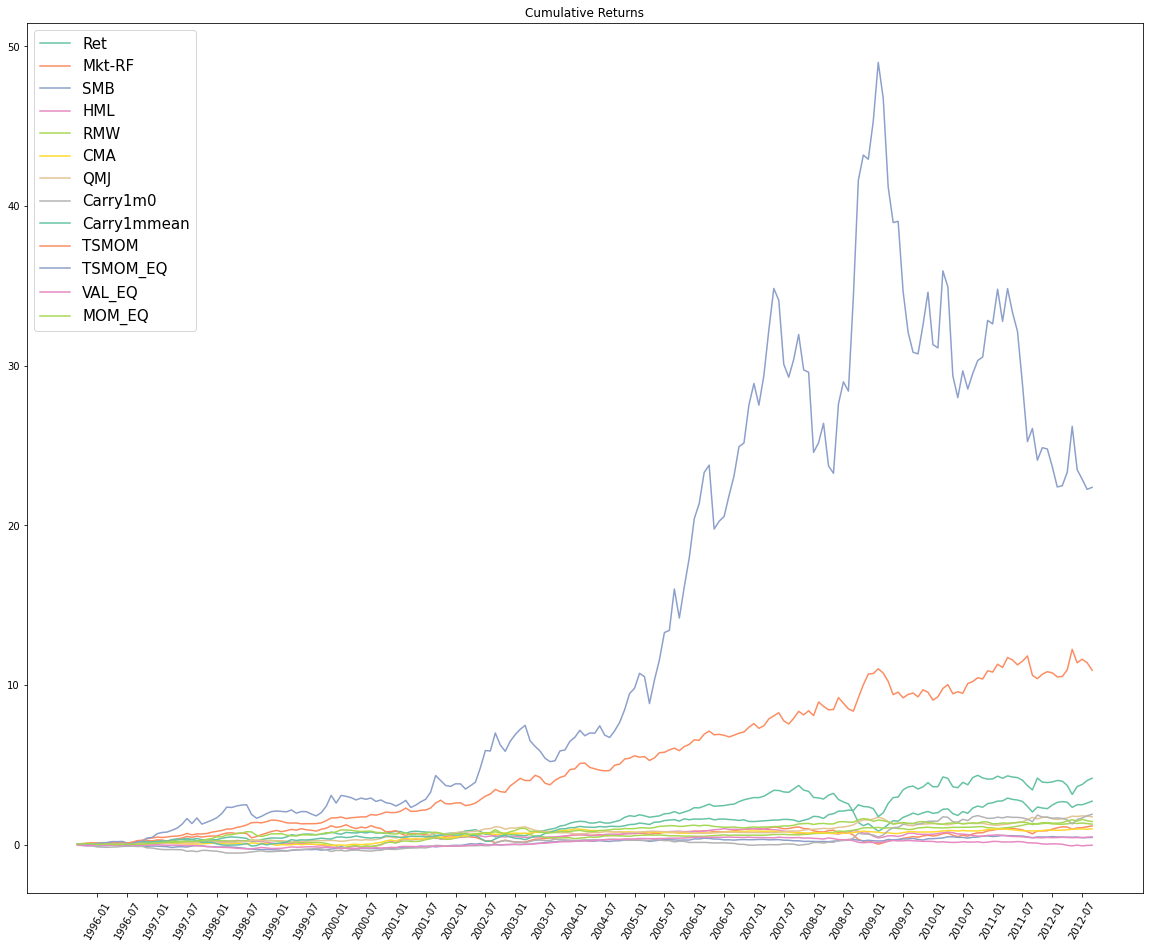

In [15]:
plot_cumulative_returns(merged_df, 'Set2')

Plot without the Momentum portfolios for better visualization.

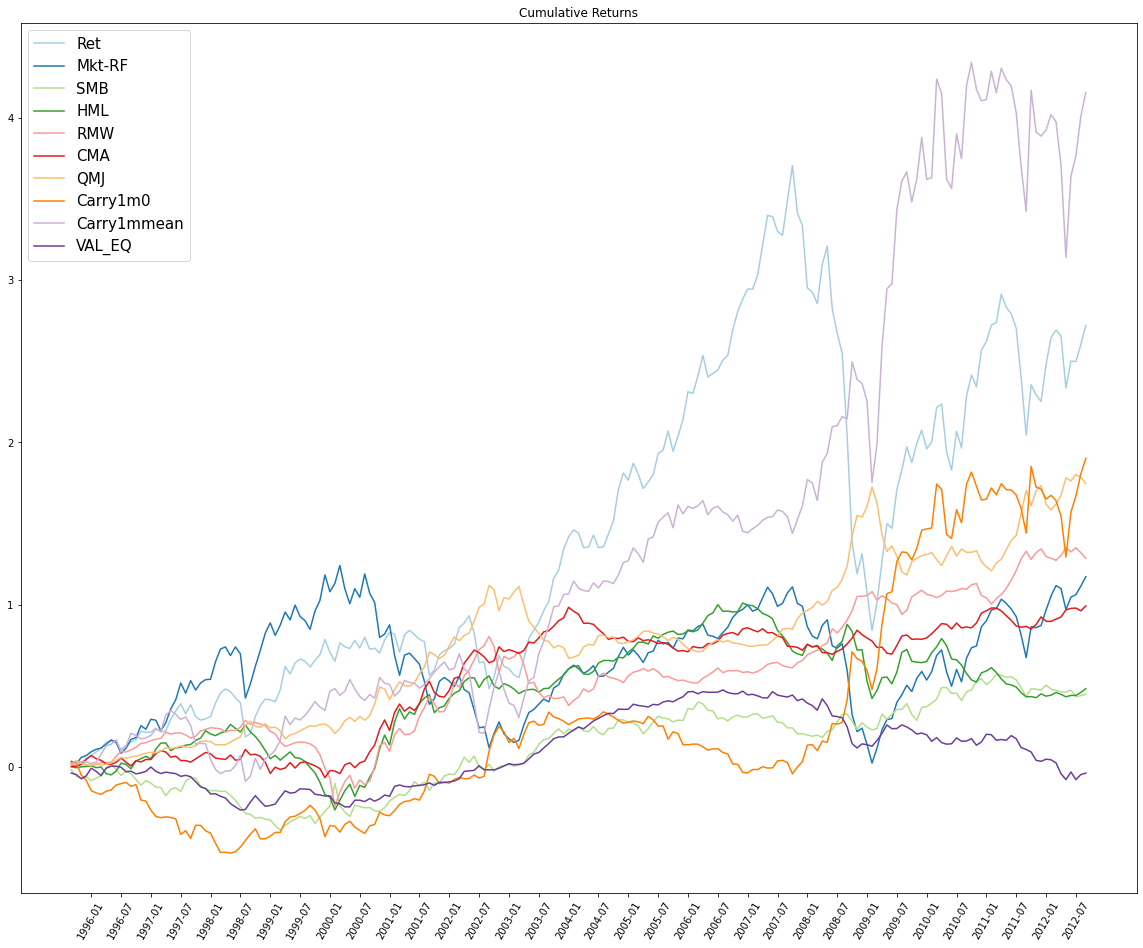

In [16]:
plot_cumulative_returns(merged_df.drop(['TSMOM', 'TSMOM_EQ', 'MOM_EQ'], axis=1), 'Paired')

# **Regressions**

In [17]:
ff5_reg = pd.merge(fund_returns, ff5, on='Date', how='inner')
qmj_reg = pd.merge(fund_returns, qmj, on='Date', how='inner')
carry_reg = pd.merge(fund_returns, carry, on='Date', how='inner')
tsmom_reg = pd.merge(fund_returns, tsmom, on='Date', how='inner')
valmom_reg = pd.merge(fund_returns, valmom, on='Date', how='inner')

In [18]:
# Function to do regression on each column individually.

import statsmodels.api as sm

def regress_individual(df):

    endog = df['Ret']

    for column in df.drop(['Date', 'Ret'], axis=1).columns:
        
        exog = sm.add_constant(df[column])
        reg = sm.OLS(endog, exog).fit()
        print(f'Factor: {column} \n')
        print(f"Alpha: {round(reg.params['const'],4)}")
        print(f"Alpha significance (p-value): {round(reg.pvalues['const'],4)} \n")
        print(f"Beta: {round(reg.params[column],4)}")
        print(f"Beta significance (p-value): {round(reg.pvalues[column],4)} \n\n ---------------------------------------- \n")

def regress_all(df):

    endog = df['Ret']
    exog = sm.add_constant(df[df.drop(['Date', 'Ret'], axis=1).columns])
    reg = sm.OLS(endog, exog).fit()
    print(reg.summary())

### **FF5**

In [19]:
regress_individual(ff5_reg)

Factor: Mkt-RF 

Alpha: 0.0016
Alpha significance (p-value): 0.1647 

Beta: 0.9172
Beta significance (p-value): 0.0 

 ---------------------------------------- 

Factor: SMB 

Alpha: 0.0073
Alpha significance (p-value): 0.004 

Beta: 0.3706
Beta significance (p-value): 0.0 

 ---------------------------------------- 

Factor: HML 

Alpha: 0.0077
Alpha significance (p-value): 0.0033 

Beta: 0.0708
Beta significance (p-value): 0.3532 

 ---------------------------------------- 

Factor: RMW 

Alpha: 0.0093
Alpha significance (p-value): 0.0003 

Beta: -0.3896
Beta significance (p-value): 0.0 

 ---------------------------------------- 

Factor: CMA 

Alpha: 0.0088
Alpha significance (p-value): 0.0007 

Beta: -0.3622
Beta significance (p-value): 0.0016 

 ---------------------------------------- 



In [20]:
regress_all(ff5_reg)

                            OLS Regression Results                            
Dep. Variable:                    Ret   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     348.1
Date:                Fri, 21 Apr 2023   Prob (F-statistic):          1.69e-127
Time:                        11:51:15   Log-Likelihood:                 843.63
No. Observations:                 328   AIC:                            -1675.
Df Residuals:                     322   BIC:                            -1653.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.001      0.126      0.9

### **QMJ**

In [21]:
regress_individual(qmj_reg)

Factor: QMJ 

Alpha: 0.0154
Alpha significance (p-value): 0.0 

Beta: -1.4865
Beta significance (p-value): 0.0 

 ---------------------------------------- 



In [22]:
regress_all(qmj_reg)

                            OLS Regression Results                            
Dep. Variable:                    Ret   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     306.8
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           7.15e-49
Time:                        11:51:15   Log-Likelihood:                 647.82
No. Observations:                 328   AIC:                            -1292.
Df Residuals:                     326   BIC:                            -1284.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0154      0.002      8.058      0.0

### **Carry**

In [23]:
regress_individual(carry_reg)

Factor: Carry1m0 

Alpha: 0.0083
Alpha significance (p-value): 0.0186 

Beta: -0.0858
Beta significance (p-value): 0.1772 

 ---------------------------------------- 

Factor: Carry1mmean 

Alpha: 0.0036
Alpha significance (p-value): 0.249 

Beta: 0.4331
Beta significance (p-value): 0.0 

 ---------------------------------------- 



In [24]:
regress_all(carry_reg)

                            OLS Regression Results                            
Dep. Variable:                    Ret   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     74.01
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           7.72e-25
Time:                        11:51:15   Log-Likelihood:                 381.75
No. Observations:                 205   AIC:                            -757.5
Df Residuals:                     202   BIC:                            -747.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0039      0.003      1.467      

### **TS MOM**

In [25]:
regress_individual(tsmom_reg)

Factor: TSMOM 

Alpha: 0.01
Alpha significance (p-value): 0.0002 

Beta: -0.2316
Beta significance (p-value): 0.0007 

 ---------------------------------------- 

Factor: TSMOM_EQ 

Alpha: 0.0072
Alpha significance (p-value): 0.0061 

Beta: 0.0477
Beta significance (p-value): 0.1479 

 ---------------------------------------- 



In [26]:
regress_all(tsmom_reg)

                            OLS Regression Results                            
Dep. Variable:                    Ret   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     12.65
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           5.11e-06
Time:                        11:51:15   Log-Likelihood:                 551.36
No. Observations:                 328   AIC:                            -1097.
Df Residuals:                     325   BIC:                            -1085.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0098      0.003      3.786      0.0

### **VAL MOM**

In [27]:
regress_individual(valmom_reg)

Factor: VAL_EQ 

Alpha: 0.009
Alpha significance (p-value): 0.0002 

Beta: 0.7744
Beta significance (p-value): 0.0 

 ---------------------------------------- 

Factor: MOM_EQ 

Alpha: 0.01
Alpha significance (p-value): 0.0001 

Beta: -0.3826
Beta significance (p-value): 0.0 

 ---------------------------------------- 



In [28]:
regress_all(valmom_reg)

                            OLS Regression Results                            
Dep. Variable:                    Ret   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     31.37
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           4.11e-13
Time:                        11:51:15   Log-Likelihood:                 537.22
No. Observations:                 307   AIC:                            -1068.
Df Residuals:                     304   BIC:                            -1057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0092      0.002      3.787      0.0

### **ALL**

In [29]:
regress_all(merged_df)

                            OLS Regression Results                            
Dep. Variable:                    Ret   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     153.4
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           2.07e-91
Time:                        11:51:15   Log-Likelihood:                 567.24
No. Observations:                 205   AIC:                            -1108.
Df Residuals:                     192   BIC:                            -1065.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0038      0.001      2.793      

# **Exposure Robustness**

In [31]:
def plot_alpha_robust(alpha, dates, label, col):

    plt.rcParams["figure.figsize"] = (15,11)
    xticks = [dates[i] for i in list(np.arange(4,len(dates),6))]
    plt.plot(dates, alpha, label=label, color=col)
    plt.axhline(y = 0, color = 'black', linestyle = '--')

    # Add a legend and title to the plot
    plt.xticks(xticks, rotation=60)
    plt.legend(prop={'size': 15})
    plt.title(f"Alpha Robustness for {label} factor")

    # Show the plot
    plt.show()

def plot_beta_robust(beta, dates, label, col):

    plt.rcParams["figure.figsize"] = (15,11)
    xticks = [dates[i] for i in list(np.arange(4,len(dates),6))]
    plt.plot(dates, beta, label=label, color=col)
    plt.axhline(y = 1, color = 'black', linestyle = '--')

    # Add a legend and title to the plot
    plt.xticks(xticks, rotation=60)
    plt.legend(prop={'size': 15})
    plt.title(f"Beta Robustness for {label} factor")

    # Show the plot
    plt.show()

In [32]:
def robust_exposure(df, factor):
    alpha_ot = []
    beta_ot = []
    dates = []
    selected = df[['Date','Ret', factor]]
    for month in range(0, len(df)-60, 1):
        subset = selected[month: month+60]
        endog = subset['Ret']
        exog = sm.add_constant(subset[factor])
        reg = sm.OLS(endog, exog).fit()
        alpha_ot.append(reg.params['const'])
        beta_ot.append(reg.params[factor])
        dates.append(subset.reset_index(drop=True)['Date'][0])
    return alpha_ot, beta_ot, dates

### **Mkt-RF**

In [33]:
alphas, betas, dates = robust_exposure(ff5_reg, 'Mkt-RF')

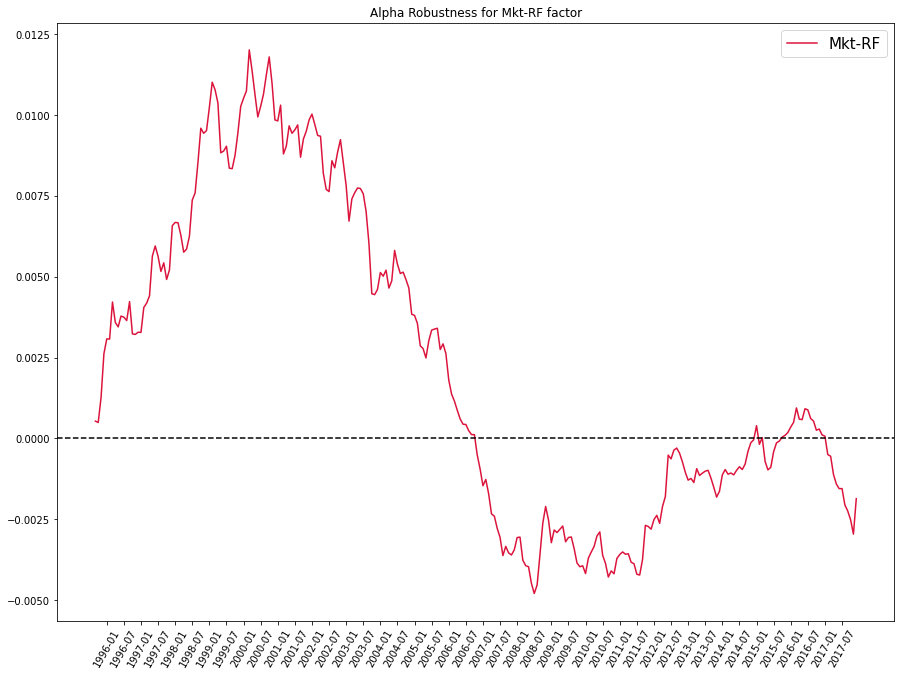

In [34]:
plot_alpha_robust(alphas, dates, 'Mkt-RF', 'crimson')

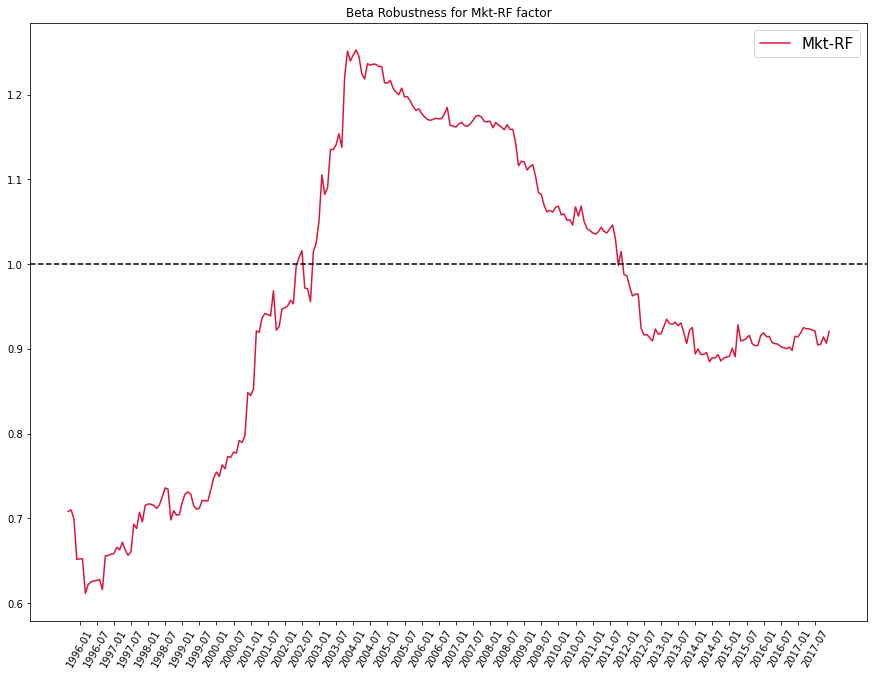

In [35]:
plot_beta_robust(betas, dates, 'Mkt-RF', 'crimson')

### **QMJ**

In [36]:
alphas, betas, dates = robust_exposure(qmj_reg, 'QMJ')

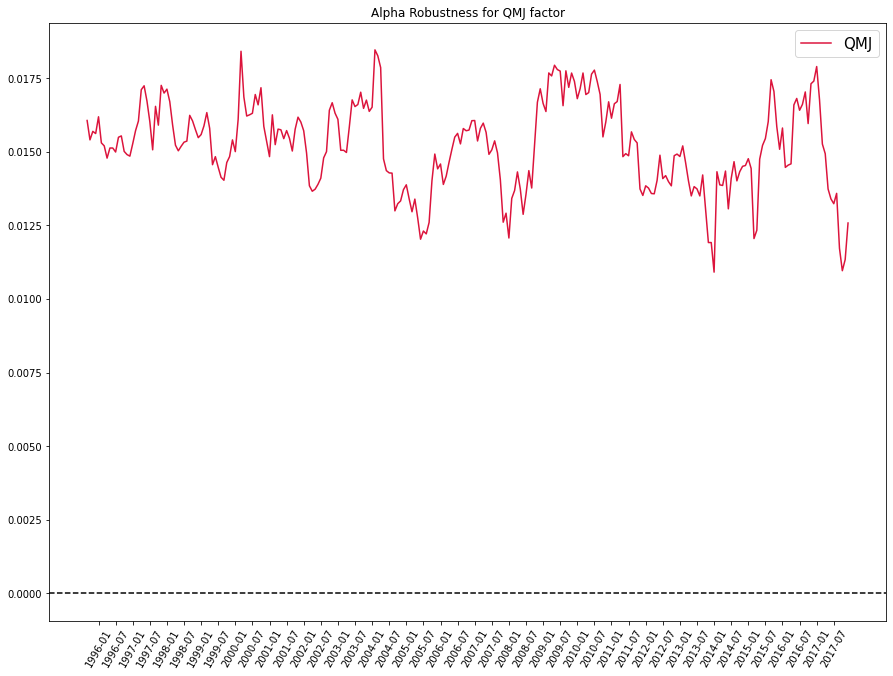

In [37]:
plot_alpha_robust(alphas, dates, 'QMJ', 'crimson')

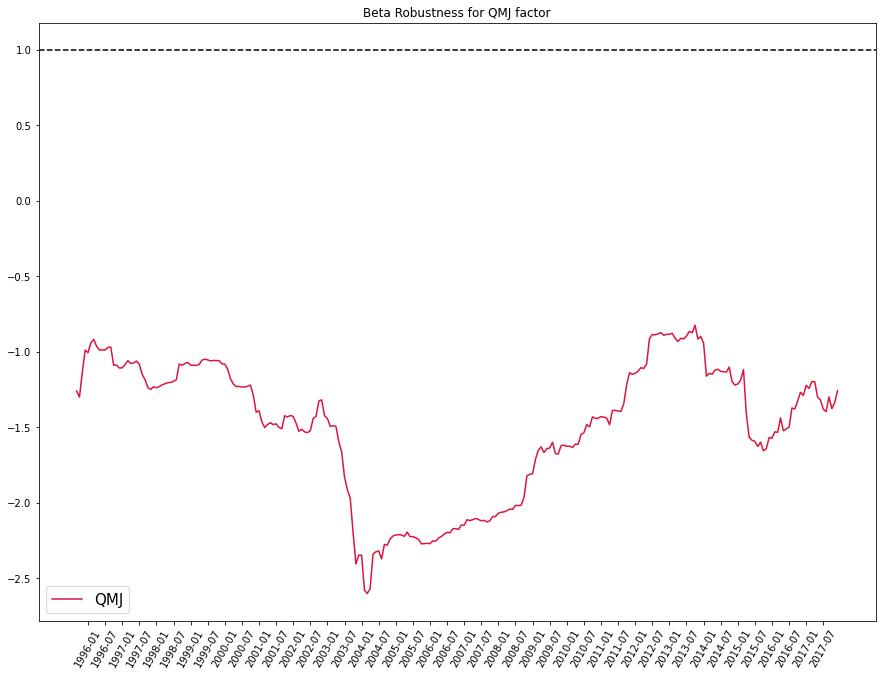

In [38]:
plot_beta_robust(betas, dates, 'QMJ', 'crimson')

### **VAL_EQ**

In [39]:
alphas, betas, dates = robust_exposure(valmom_reg, 'VAL_EQ')

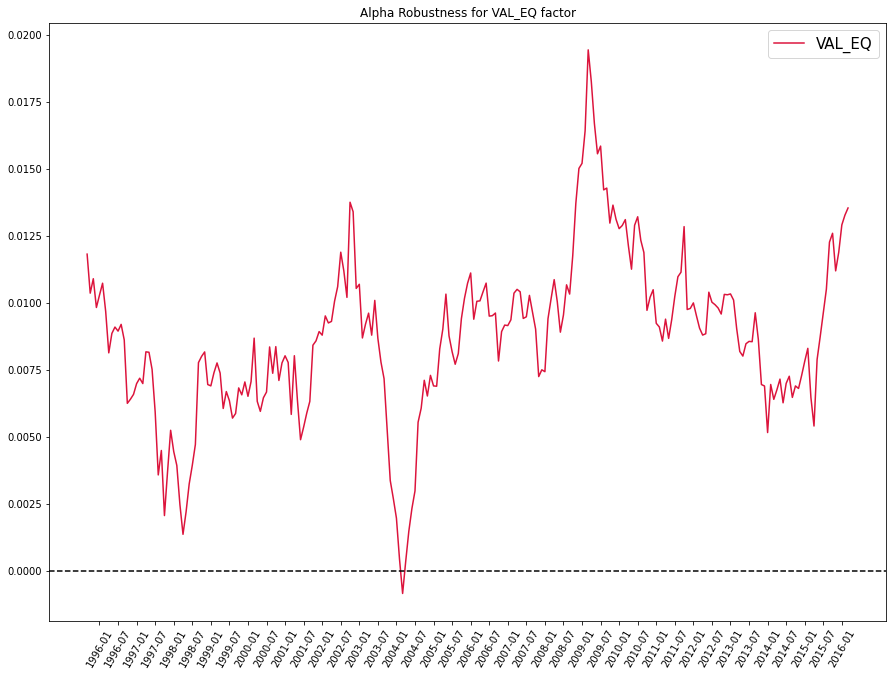

In [40]:
plot_alpha_robust(alphas, dates, 'VAL_EQ', 'crimson')

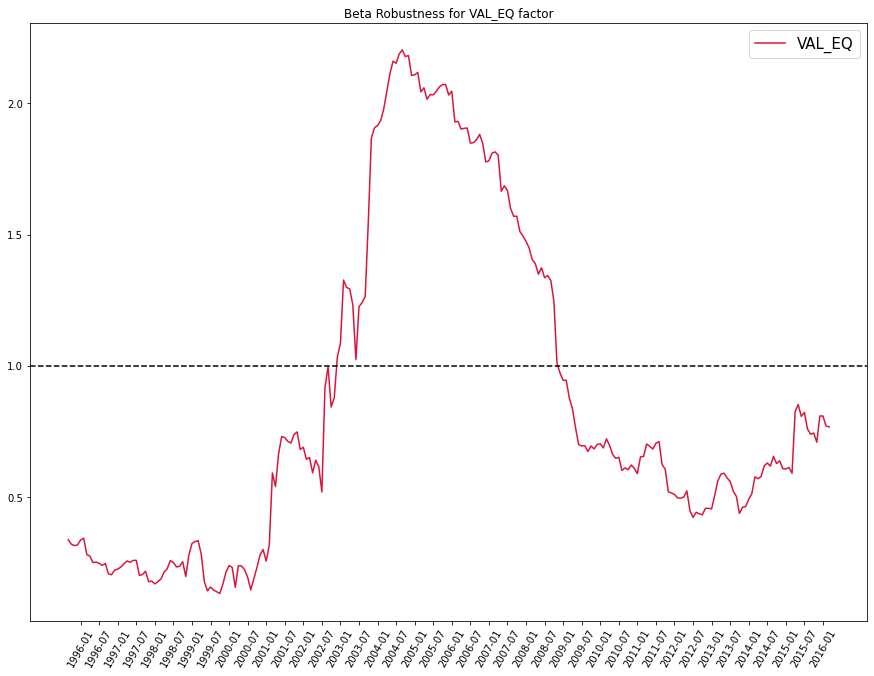

In [41]:
plot_beta_robust(betas, dates, 'VAL_EQ', 'crimson')

### **RMW**

In [42]:
alphas, betas, dates = robust_exposure(ff5_reg, 'RMW')

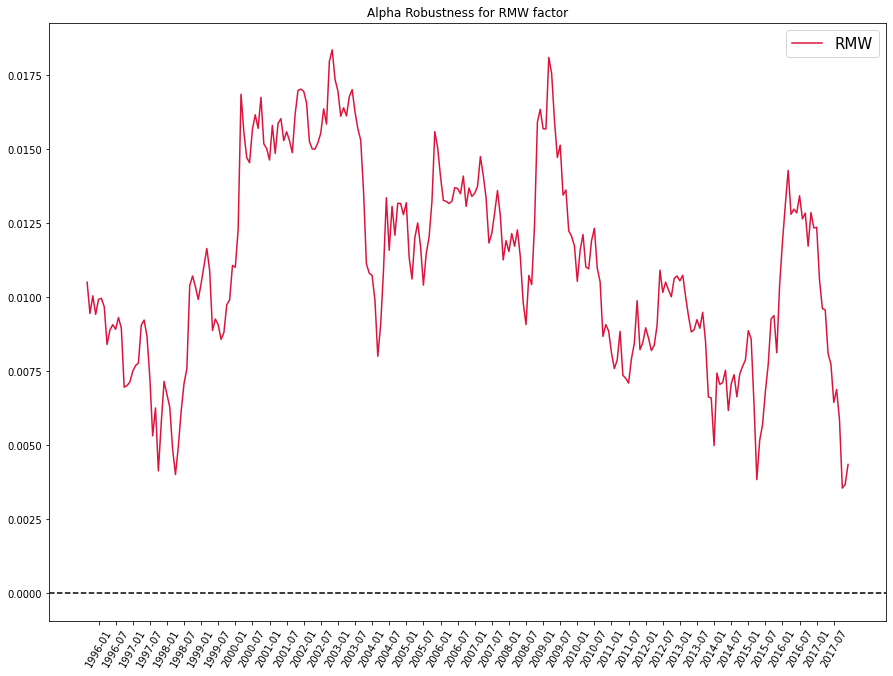

In [43]:
plot_alpha_robust(alphas, dates, 'RMW', 'crimson')

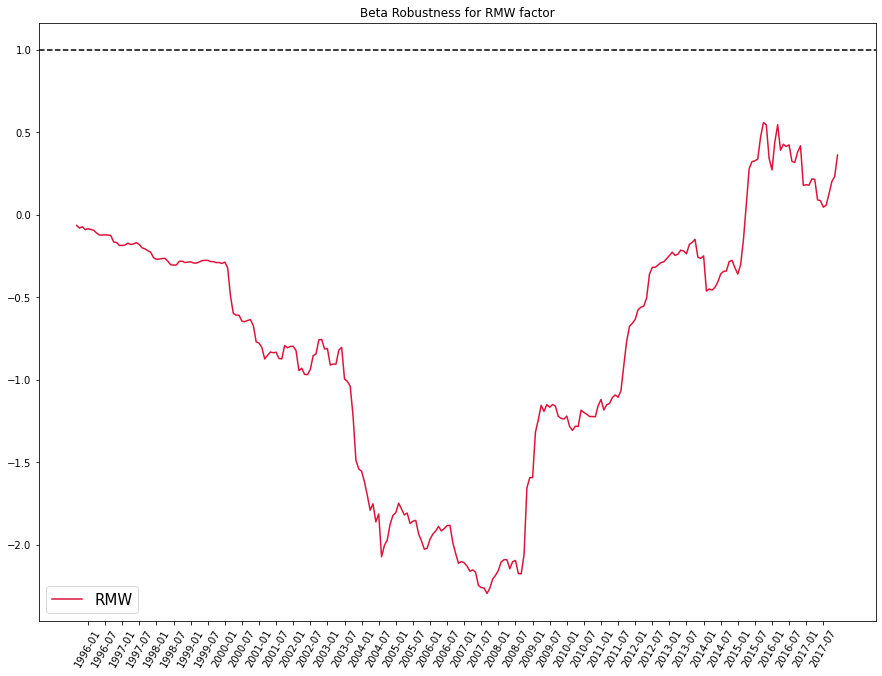

In [44]:
plot_beta_robust(betas, dates, 'RMW', 'crimson')

In [55]:
def plot_cumulative_returns_labels(df, palette, labels):
    """
    Plots the cumulative returns of return columns in a pandas dataframe.
    """

    plt.rcParams["figure.figsize"] = (20,16)
    dates = df['Date']
    xticks = df['Date'][list(np.arange(4,len(dates),6))]
    colors = sns.color_palette(palette, len(df.columns)-1)

    for i, column in enumerate(df.drop('Date', axis=1).columns):
        cum_ret = (1 + df[column]).cumprod() - 1
        plt.plot(dates, cum_ret, label=labels[i], color=colors[i])

    # Add a legend and title to the plot
    plt.xticks(xticks, rotation=60)
    plt.legend(prop={'size': 15})
    plt.title("Cumulative Returns")

    # Show the plot
    plt.show()

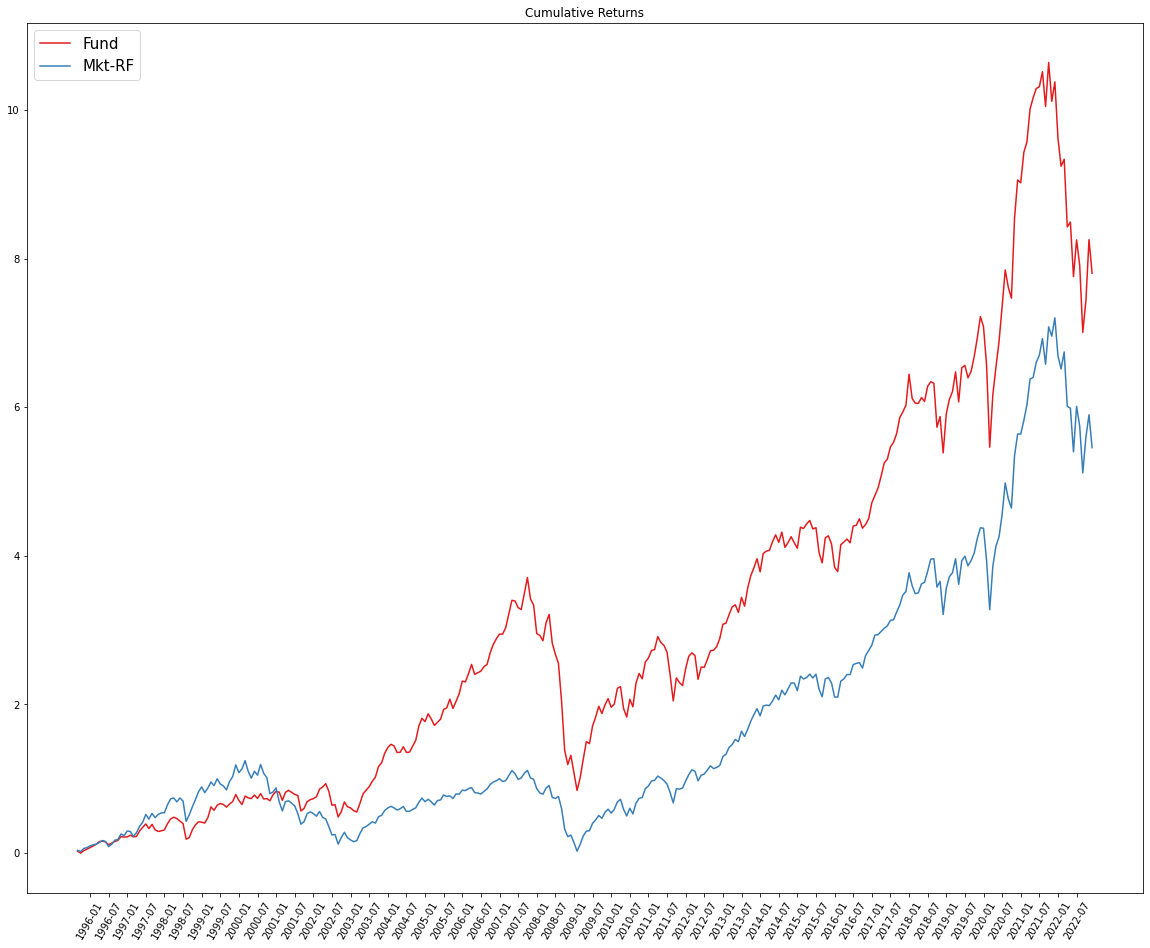

In [56]:
plot_cumulative_returns_labels(ff5_reg.drop(['SMB', 'HML', 'RMW', 'CMA'], axis=1), 'Set1', labels=['Fund', 'Mkt-RF'])